#Actividad Unidad 11

##Imports

In [ ]:
#instalar la API
!pip install sodapy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sbn

##Funciones

###Cargar Dataset

In [ ]:
def cargarDataset(codigo, limite):
  #Crear el cleinte con la url
  client = Socrata("www.datos.gov.co", None)
  # hacer la peticion get al cliente con el codigo del dataset
  return client.get(codigo, limit=limite)

###Convertir a Datos Númericos

In [ ]:
def toNum(datos):
  le = LabelEncoder()

  for col in datos.columns:
    datos[col] = le.fit_transform(datos[col])
    #print(col.center(50,'-'))
    #print(le.classes_)

  return datos

## 1 Punto

###Cargar Dataset

Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia.

Dataset **Clasificación en Triage Urgencias**, cargado de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Clasificaci-n-en-Triage-Urgencias/vt5n-eu2r

In [ ]:
# Llamar a la función cargar dataset
results = cargarDataset("vt5n-eu2r", 90000)

In [ ]:
#Convertir en DataFrame
datos = pd.DataFrame.from_records(results)
datos

,codadminis,nom_admini,fecha_ing,hora_ingre,fecha_atencion,hora_atencion,triage,ips,red
0,ESS118,EMSSANAR S.A.S,2020-01-23T08:29:02.367,1900-01-01T08:29:00.000,2020-01-23T08:36:00.000,1900-01-01T08:36:00.000,III,HOSPITAL LOCAL CIVIL,RED NORTE
1,ESS118,EMSSANAR S.A.S,2020-01-23T08:29:02.367,1900-01-01T08:29:00.000,2020-01-23T08:36:00.000,1900-01-01T08:36:00.000,III,HOSPITAL LOCAL CIVIL,RED NORTE
2,ESS118,EMSSANAR S.A.S,2020-01-14T09:27:46.377,1900-01-01T09:27:00.000,2020-01-14T10:18:00.000,1900-01-01T10:18:00.000,III,HOSPITAL LOCAL CIVIL,RED NORTE
3,ESS118,EMSSANAR S.A.S,2020-02-29T09:01:31.853,1900-01-01T09:01:00.000,2020-02-29T09:11:00.000,1900-01-01T09:11:00.000,III,CENTRO HOSPITAL LA ROSA,RED SUR
4,ESS118,EMSSANAR S.A.S,2020-02-09T17:26:00.740,1900-01-01T17:26:00.000,2020-02-09T17:50:00.000,1900-01-01T17:50:00.000,III,HOSPITAL LOCAL CIVIL,RED NORTE
...,...,...,...,...,...,...,...,...,...
89448,ESS118,EMSSANAR ENTIDAD PROMOTORA DE SALUD S.A.S,2022-08-26T22:09:00.000,1900-01-01T22:09:00.000,2022-08-26T22:25:00.000,1900-01-01T22:25:00.000,III,CENTRO HOSPITAL LA ROSA,RED SUR
89449,ESS118,EMSSANAR ENTIDAD PROMOTORA DE SALUD S.A.S,2022-08-06T12:23:00.000,1900-01-01T12:23:00.000,2022-08-06T14:27:00.000,1900-01-01T14:27:00.000,III,CENTRO HOSPITAL LA ROSA,RED SUR
89450,ESS118,EMSSANAR ENTIDAD PROMOTORA DE SALUD S.A.S,2022-08-30T01:26:00.000,1900-01-01T01:25:00.000,2022-08-30T02:22:00.000,1900-01-01T02:22:00.000,III,HOSPITAL LOCAL CIVIL,RED NORTE
89451,ESS118,EMSSANAR ENTIDAD PROMOTORA DE SALUD S.A.S,2022-08-25T08:38:00.000,1900-01-01T08:38:00.000,2022-08-25T09:07:00.000,1900-01-01T09:07:00.000,III,CS SAN VICENTE,RED OCCIDENTE


###Limpieza de Datos

Realice las tareas de limpieza necesarias.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89453 entries, 0 to 89452
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   codadminis      89452 non-null  object
 1   nom_admini      89452 non-null  object
 2   fecha_ing       89453 non-null  object
 3   hora_ingre      89453 non-null  object
 4   fecha_atencion  89453 non-null  object
 5   hora_atencion   89453 non-null  object
 6   triage          89453 non-null  object
 7   ips             89453 non-null  object
 8   red             89453 non-null  object
dtypes: object(9)
memory usage: 6.1+ MB


####Eliminar Null

Se procede a borrar las filas que contengan los datos null.

In [ ]:
datos = datos.dropna(axis=0, how="any")
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89452 entries, 0 to 89452
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   codadminis      89452 non-null  object
 1   nom_admini      89452 non-null  object
 2   fecha_ing       89452 non-null  object
 3   hora_ingre      89452 non-null  object
 4   fecha_atencion  89452 non-null  object
 5   hora_atencion   89452 non-null  object
 6   triage          89452 non-null  object
 7   ips             89452 non-null  object
 8   red             89452 non-null  object
dtypes: object(9)
memory usage: 6.8+ MB


####Convertir a Datos Númericos

In [ ]:
#Llamar a la funcion toNum
datos = toNum(datos)
datos

<ipython-input-132-23284677c507>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[col] = le.fit_transform(datos[col])
<ipython-input-132-23284677c507>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[col] = le.fit_transform(datos[col])
<ipython-input-132-23284677c507>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,codadminis,nom_admini,fecha_ing,hora_ingre,fecha_atencion,hora_atencion,triage,ips,red
0,66,36,2548,509,2456,515,2,7,0
1,66,36,2548,509,2456,515,2,7,0
2,66,36,1499,567,1445,617,2,7,0
3,66,36,6946,541,6672,550,2,0,3
4,66,36,4584,1046,4415,1069,2,7,0
...,...,...,...,...,...,...,...,...,...
89448,66,35,68739,1329,68335,1344,2,0,3
89449,66,35,64869,743,64520,866,2,0,3
89450,66,35,69280,85,68864,142,2,7,0
89451,66,35,68399,518,67991,546,2,4,1


### Datos de Prueba y Datos de Entrenamiento

Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset.

####Variables Predictorias y Objetivo

In [ ]:
#Variables Predictorias
X = datos.drop('triage', axis=1)

#Variable Objetivo: La variable objetivo será triage.
y = datos['triage']

####Division de Datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.15, random_state=123)

###Aplicar Algoritmo: K Nearest Neighbors Classifier

Aplicar el algoritmo de clasificación de los K vecinos más cercanos.

####Entrenar el Algoritmo

Algortimo con **k = 5**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

####Predecir

In [ ]:
y_predict = knn.predict(X_test)
y_predict

array([2, 2, 2, ..., 2, 2, 2])

###Puntajes de Clasificación

Calcular los puntajes de la clasificación.

In [ ]:
knn.score(X_test, y_test)

0.8817260396482337

In [ ]:
accuracy_score(y_test,y_predict)

0.8817260396482337

###Conclusión

Concluir si la clasificación fue buena o no.

Con un puntaje de **88%** el algoritmo es bueno; sin embargo, se recomienda buscar un algoritmo con puntaje superior a 95%, para enviar a producción.

####Elección Parámetro K

Simplemente se crearán diccionarios que contendrán los puntajes tanto para el conjunto de entrenamiento como para el conjunto de prueba, y se calcularán dichos puntajes para un número de vecinos que varía entre 1 y 100 y salta de 10 en 10.

In [ ]:
train_scores = {} #puntajes datos de entrenamiento
test_scores = {} #puntajes datos de prueba
neighbors = np.arange(1,101,10) #numero de los vecinos del 1 al 100 de 10 en 10
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor) # algoritmo con el parametro k
  knn = knn.fit(X_train,y_train) #entrenar el algoritmo con los datos
  train_scores[neighbor] = knn.score(X_train, y_train) #puntajes de los datos train
  test_scores[neighbor] = knn.score(X_test, y_test) #puntajes de los datos test

Al imprimir los puntajes y graficarlos, se ve que, en la línea azul, la de prueba, el comportamiento tiende a ser igual si se tienen mas de **10** vecinos, por lo tanto, el parámetro de vecinos fijado en 10 es el apropiado.

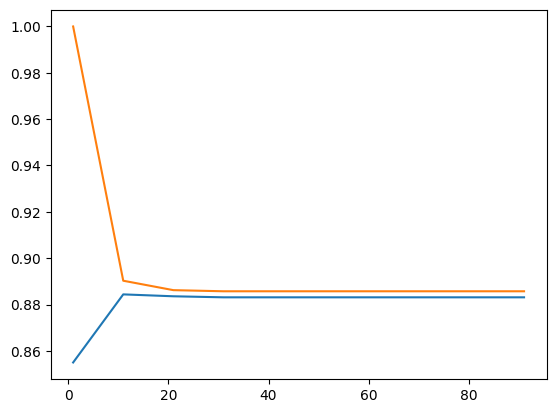

In [ ]:
test_data = test_scores
# Obtener las claves y los valores del diccionario
x_test_data = list(test_data.keys())
y_test_data = list(test_data.values())
plt.plot(x_test_data,y_test_data)

train_data = train_scores
# Obtener las claves y los valores del diccionario
x_train_data = list(train_data.keys())
y_train_data = list(train_data.values())
plt.plot(x_train_data,y_train_data);

Se puede concluir que la elección del parametro **k=5** vecinos, es el adecuado para que algoritmo de una buena clasificación a la hora de predecir los valores de los datos, ya que los puntajes tienen a una probabilidad de 88%, de 5 vecinos en adelante.

##2 Punto

###Cargar Dataset

Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia.

Dataset **Morbilidad por Cáncer**, cargado de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/MORBILIDAD-POR-CANCER/utgq-6fdm

In [ ]:
# Llamar a la función cargar dataset
results = cargarDataset("utgq-6fdm", 50000)

In [ ]:
#Convertir en DataFrame
datos = pd.DataFrame.from_records(results)
datos

,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,a_o
0,LESION DE SITIOS CONTIGUOS DE LA PIEL,C448,42,M,U,CONTRIBUTIVO,2.019
1,TUMOR MALIGNO DE LA PROSTATA,C61X,42,M,U,CONTRIBUTIVO,2.019
2,LESION DE SITIOS CONTIGUOS DE LA LARINGE,C328,43,M,U,CONTRIBUTIVO,2.019
3,LEUCEMIA MIELOIDE CRONICA,C921,42,M,U,SUBSIDIADO,2.019
4,"TUMOR MALIGNO DE LA NASOFARINGE, PARTE NO ESPE...",C119,42,M,U,CONTRIBUTIVO,2.019
...,...,...,...,...,...,...,...
40652,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",C509,53,F,U,CONTRIBUTIVO,2020
40653,TUMOR MALIGNO DE LA COLUMNA VERTEBRAL,C412,41,M,U,CONTRIBUTIVO,2020
40654,"TUMOR MALIGNO DEL COLON, PARTE NO ESPECIFICADA",C189,51,F,U,CONTRIBUTIVO,2020
40655,"TUMOR MALIGNO DEL RIÃ‚Â¥ON, EXCEPTO DE LA PELV...",C64X,2,M,U,SUBSIDIADO,2020


###Limpieza de Datos

Realice las tareas de limpieza necesarias.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40657 entries, 0 to 40656
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nombre_diagnostico  40657 non-null  object
 1   codigo_diagnostico  40657 non-null  object
 2   edad                40657 non-null  object
 3   sexo                40657 non-null  object
 4   zona                40657 non-null  object
 5   regimen             40657 non-null  object
 6   a_o                 40657 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


#### Convertir los valores de la columna a_o

In [ ]:
datos['a_o'] = datos['a_o'].replace('2.019', '2019', inplace = True)
datos[datos.a_o=='2.02']

,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,a_o


In [ ]:
datos['a_o'].replace('2.02', '2020', inplace = True)
datos[datos.a_o=='2.02']

,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,a_o


####Convertir a Datos Númericos

In [ ]:
#Llamar a la funcion toNum
datos = toNum(datos)
datos

,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,a_o
0,17,158,38,1,1,0,0
1,189,217,38,1,1,0,0
2,12,112,39,1,1,0,0
3,58,339,38,1,1,5,0
4,162,40,38,1,1,0,0
...,...,...,...,...,...,...,...
40652,159,192,50,0,1,0,0
40653,135,136,37,1,1,0,0
40654,245,77,48,0,1,0,0
40655,316,225,13,1,1,5,0


###Aplicar Algoritmo: K Means

####Instanciar Algoritmo

In [ ]:
kmeans = KMeans(n_clusters=4)

####Entrenar el Algoritmo

In [ ]:
kmeans = kmeans.fit(datos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Puntajes de Agrupación

Calcular los puntajes de la agrupación.

In [ ]:
y_predict = kmeans.predict(datos)
silhouette_score(datos, y_predict)

0.48872778846462267

###Gráfica

Representar gráficamente los grupos.

In [ ]:
datos['y_pred'] = pd.Series(y_predict)
datos.head()

,nombre_diagnostico,codigo_diagnostico,edad,sexo,zona,regimen,a_o,y_pred
0,17,158,38,1,1,0,0,1
1,189,217,38,1,1,0,0,1
2,12,112,39,1,1,0,0,1
3,58,339,38,1,1,5,0,3
4,162,40,38,1,1,0,0,0


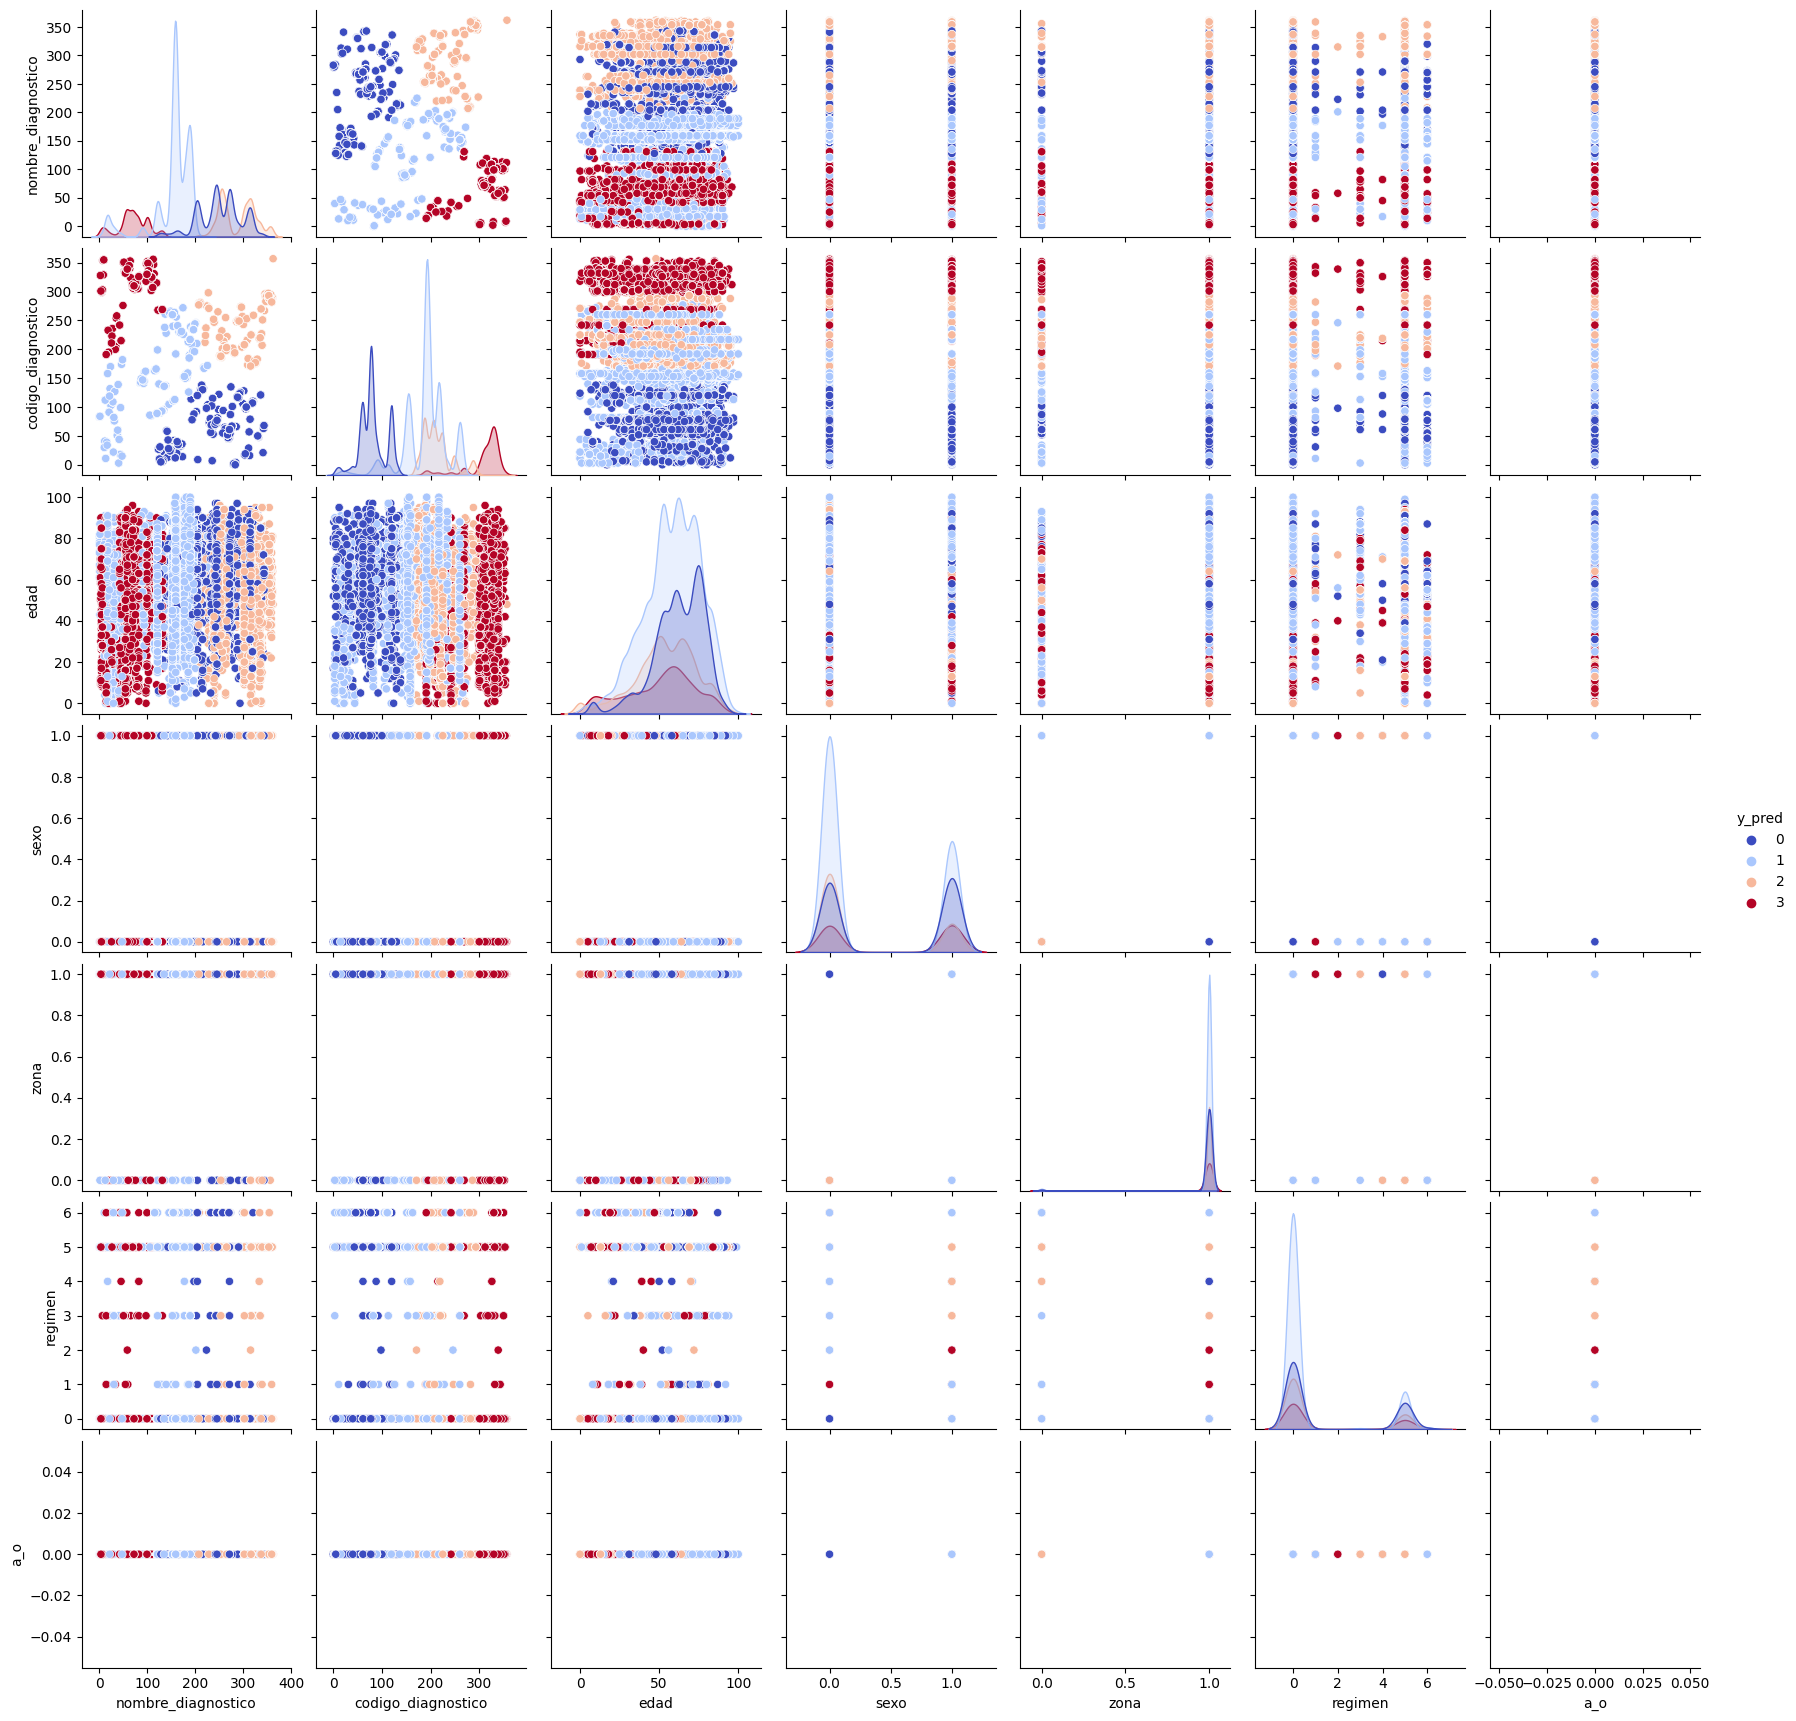

In [ ]:
sbn.pairplot(datos, hue='y_pred', palette='coolwarm');

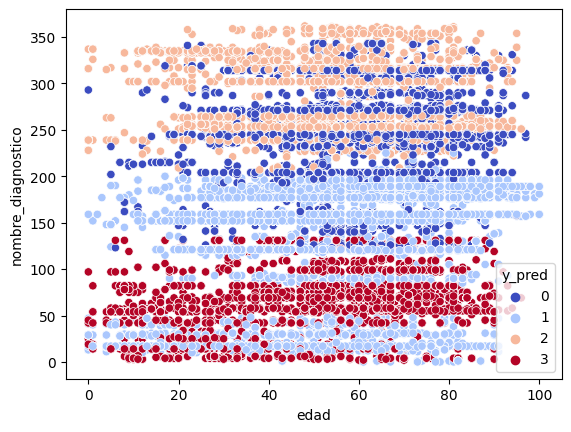

In [ ]:
#grafico de dispersion
sbn.scatterplot(datos,x='edad',y='nombre_diagnostico',hue='y_pred',palette='coolwarm');

###Conclusión

Concluir si la agrupación fue buena o no.

Después de realizar las actividades de carga, limpieza y aplicación del algoritmo de agrupamiento de K-medias, y calcular los puntajes de agrupación, se puede proceder a la conclusión.

En base a los resultados obtenidos, podemos evaluar la calidad de la agrupación considerando varios aspectos:

1. Coherencia interna de los grupos: Podemos analizar la similitud entre los elementos dentro de cada grupo. Si los elementos dentro de un grupo son similares entre sí y tienen diferencias significativas con respecto a los elementos de otros grupos, podemos considerar que la agrupación es coherente internamente.

2. Separación entre los grupos: Evaluaremos si hay una separación clara y significativa entre los grupos. Si los grupos están bien diferenciados y no hay una superposición significativa entre ellos, la agrupación es considerada buena en términos de separación.

3. Interpretación de los grupos: Es importante evaluar la interpretabilidad de los grupos resultantes. Si los grupos tienen una interpretación lógica y coherente en relación con el contexto de los datos y los objetivos del análisis, esto respalda la validez de la agrupación.

Con base en estas evaluaciones, se concluye los grupos se observan un poco mezclados, se dificulta una interpretación clara, entonces la agrupación puede no ser satisfactoria.

Además de la conclusión, como sugerencia, se recomienda realizar un análisis adicional para validar y refinar los resultados de la agrupación. Esto podría incluir la utilización de métricas de evaluación específicas para la agrupación, como el índice de Silhouette o la validación externa mediante etiquetas conocidas. También se podría considerar la aplicación de diferentes algoritmos de agrupamiento y evaluar su rendimiento comparativo. Esto ayudaría a tener una evaluación más sólida de la agrupación y garantizar la robustez de los resultados.